In [22]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 1.1 MB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=5119ddd5bd8f086bba6bd0944139aa7cad38a8e8e2da825fe495e0c5200d8485
  Stored in directory: /Users/heatherjohansen/Library/Caches/pip/wheels/09/eb/0d/4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry

import sys
import resource, sys


In [4]:
cd ..

/Users/heatherjohansen/Desktop/dsi/Projects/Mass-Protests


In [5]:
mass = pd.read_csv('./data/mass_mobile.csv')
mass.reset_index(drop=True, inplace=True) 

In [6]:
mass.drop(columns='Unnamed: 0', inplace=True)

In [103]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15150 entries, 0 to 15178
Columns: 235 entries, id to country_alpha3
dtypes: float64(10), int64(212), object(13)
memory usage: 27.9+ MB


In [19]:
list(mass.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'coun

In [8]:
mass['num_state_responses'] = mass['arrests'] + mass['accomodation'] + mass['beatings'] + mass['crowddispersal'] + mass['ignore'] + mass['killings'] + mass['shootings']

In [17]:
mass = mass[mass['num_state_responses'] != 0]

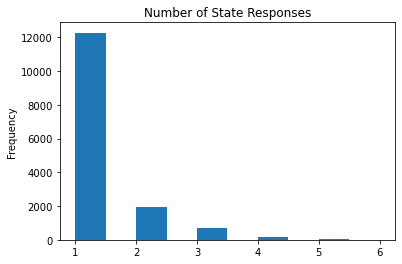

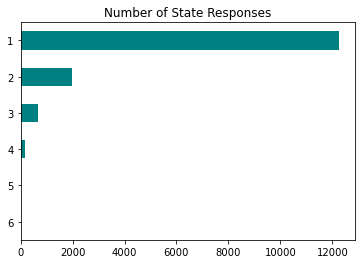

In [18]:
mass['num_state_responses'].plot(kind='hist', title='Number of State Responses')
plt.show();

# ordered_categories = ['0', '1', '2', '3',  '4', '5', '6']
# protest_cats = pd.DataFrame(mass.protest_size_category.value_counts())
# protest_cats = protest_cats.reindex(ordered_categories)
# fig_dims = (10, 6)
# fig, ax = plt.subplots(figsize=fig_dims)
# ax = sns.barplot(x=protest_cats.index, y = 'protest_size_category' , data=protest_cats, ax=ax, palette='coolwarm')
# ax.set_title("Protest Size Categories",fontsize=20)
# ax.set_xlabel("Protest Size",fontsize=15)
# ax.set_ylabel("Number of Particpants",fontsize=15)
# ax.tick_params(labelsize=10)

mass['num_state_responses'].value_counts().sort_values().plot(kind='barh', color='teal', title='Number of State Responses')
plt.show();

In [81]:
# generate country code based on country name 

def alpha3code(column):
    country_alpha3=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            country_alpha3.append(code)
        except:
            pass        
            try:
                code=pycountry.countries.get(common_name=country).alpha_3
                country_alpha3.append(code)
            except:
                pass 
                try:
                    code=pycountry.countries.get(official_name=country).alpha_3
                    country_alpha3.append(code)
                except:
                    country_alpha3.append("None")

    return country_alpha3

In [83]:
# create a column for code 
mass['country_alpha3']=alpha3code(mass['country'])
mass.head()


id country  ccode         region  protestnumber  protesterviolence  \
0  201990001  Canada     20  North America              1                0.0   
1  201990002  Canada     20  North America              2                0.0   
2  201990003  Canada     20  North America              3                0.0   
3  201990004  Canada     20  North America              4                1.0   
4  201990005  Canada     20  North America              5                1.0   

           location           protesteridentity  \
0          national                 unspecified   
1  Montreal, Quebec                 unspecified   
2  Montreal, Quebec  separatist parti quebecois   
3  Montreal, Quebec              mohawk indians   
4  Montreal, Quebec             local residents   

                                             sources  \
0  1. great canadian train journeys into history;...   
1  1. autonomy s cry revived in quebec the new yo...   
2  1. quebec protest after queen calls for unity ...   
3  1. indians gather as siege intensifies; armed ...   
4  1. dozens hurt in mohawk blockade protest the ...   

                                               notes  ...  start_date  \
0  canada s railway passenger system was finally ...  ...  1990-01-15   
1  protestors were only identified as young peopl...  ...  1990-06-25   
2  the queen, after calling on canadians to remai...  ...  1990-07-01   
3  canada s federal government has agreed to acqu...  ...  1990-07-12   
4  protests were directed against the state due t...  ...  1990-08-14   

     end_date                 target  \
0  1990-01-15  [0, 0, 0, 0, 1, 0, 0]   
1  1990-06-25  [0, 0, 0, 0, 1, 0, 0]   
2  1990-07-01  [0, 0, 0, 0, 1, 0, 0]   
3  1990-09-06  [0, 1, 0, 0, 0, 0, 0]   
4  1990-08-15  [1, 1, 0, 1, 0, 0, 0]   

                                         notes_clean    neg    neu    pos  \
0  canada s railway passenger system was finally ...  0.087  0.913  0.000   
1  protestors were only identified as young peopl...  0.000  1.000  0.000   
2  the queen, after calling on canadians to remai...  0.060  0.830  0.109   
3  canada s federal government has agreed to acqu...  0.134  0.820  0.046   
4  protests were directed against the state due t...  0.226  0.677  0.098   

   compound  num_state_responses  country_alpha3  
0   -0.8176                    1             CAN  
1    0.0000                    1             CAN  
2    0.7003                    1             CAN  
3   -0.9711                    1             CAN  
4   -0.5267                    3             CAN  

[5 rows x 235 columns]

In [29]:
mass['country_alpha3'].value_counts(dropna=False)

None    2234
GBR      577
FRA      546
IRL      431
DEU      364
        ... 
TKM        4
LUX        3
ERI        3
SSD        1
QAT        1
Name: country_alpha3, Length: 136, dtype: int64

In [92]:
mass2 = mass[['country', 'country_alpha3']][mass['country_alpha3'] == 'None']

In [93]:
mass2.groupby(['country', 'country_alpha3']).count()

Empty DataFrame
Columns: []
Index: [(Bosnia, None), (Cape Verde, None), (Congo Brazzaville, None), (Congo Kinshasa, None), (Czechoslovakia, None), (Germany East, None), (Germany West, None), (Iran, None), (Ivory Coast, None), (Kosovo, None), (Laos, None), (Macedonia, None), (North Korea, None), (Russia, None), (Serbia and Montenegro, None), (South Korea, None), (Swaziland, None), (Syria, None), (Timor Leste, None), (USSR, None), (United Arab Emirate, None), (Yugoslavia, None)]

In [88]:
mass[mass['country_alpha3'] == 'None'].groupby('country').count().index

Index(['Bosnia', 'Cape Verde', 'Congo Brazzaville', 'Congo Kinshasa',
       'Czechoslovakia', 'Germany East', 'Germany West', 'Iran', 'Ivory Coast',
       'Kosovo', 'Laos', 'Macedonia', 'North Korea', 'Russia',
       'Serbia and Montenegro', 'South Korea', 'Swaziland', 'Syria',
       'Timor Leste', 'USSR', 'United Arab Emirate', 'Yugoslavia'],
      dtype='object', name='country')

In [73]:
pycountries = list(pycountry.countries)

In [74]:
pycountries

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam

In [96]:
for ctry in mass['country']:
    if ctry == 'Iran':
        mass['country_alpha3'].replace(to_replace='None', value='IRN', inplace=True)
    else:
        pass

In [97]:
mass[mass['country_alpha3'] == 'None'].groupby('country').count().index

Index([], dtype='object', name='country')

In [101]:
mass2 = mass[['country', 'country_alpha3']][mass['country_alpha3'] == 'IRN']

In [102]:
mass2.groupby(['country', 'country_alpha3']).count()

Empty DataFrame
Columns: []
Index: [(Bosnia, IRN), (Cape Verde, IRN), (Congo Brazzaville, IRN), (Congo Kinshasa, IRN), (Czechoslovakia, IRN), (Germany East, IRN), (Germany West, IRN), (Iran, IRN), (Ivory Coast, IRN), (Kosovo, IRN), (Laos, IRN), (Macedonia, IRN), (North Korea, IRN), (Russia, IRN), (Serbia and Montenegro, IRN), (South Korea, IRN), (Swaziland, IRN), (Syria, IRN), (Timor Leste, IRN), (USSR, IRN), (United Arab Emirate, IRN), (Yugoslavia, IRN)]